<a href="https://colab.research.google.com/github/pranao0609/Machine_Learning/blob/main/Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_diabetes
dataset=load_diabetes()
print(dataset['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.DataFrame(dataset['data'],columns=['age','sex','bmi','bp','s1','s2','s3','s4','s5','s6'])

In [ ]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [ ]:
X=df
y=dataset['target']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)

In [ ]:
X_train.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.197408,0.198359,0.394903,0.238375,0.192920,-0.128403,0.227110,0.314151,0.351570
sex,0.197408,1.000000,0.108261,0.221914,0.057674,0.180315,-0.379464,0.324882,0.150956,0.193322
bmi,0.198359,0.108261,1.000000,0.356324,0.226047,0.248146,-0.395021,0.412826,0.435505,0.358273
bp,0.394903,0.221914,0.356324,1.000000,0.238295,0.165632,-0.192505,0.249141,0.420236,0.368882
s1,0.238375,0.057674,0.226047,0.238295,1.000000,0.872781,0.006313,0.559626,0.566312,0.356280
s2,0.192920,0.180315,0.248146,0.165632,0.872781,1.000000,-0.265114,0.684840,0.325759,0.315890
s3,-0.128403,-0.379464,-0.395021,-0.192505,0.006313,-0.265114,1.000000,-0.754616,-0.370523,-0.297055
s4,0.227110,0.324882,0.412826,0.249141,0.559626,0.684840,-0.754616,1.000000,0.609983,0.436311
s5,0.314151,0.150956,0.435505,0.420236,0.566312,0.325759,-0.370523,0.609983,1.000000,0.490970
s6,0.351570,0.193322,0.358273,0.368882,0.356280,0.315890,-0.297055,0.436311,0.490970,1.000000


<Axes: >

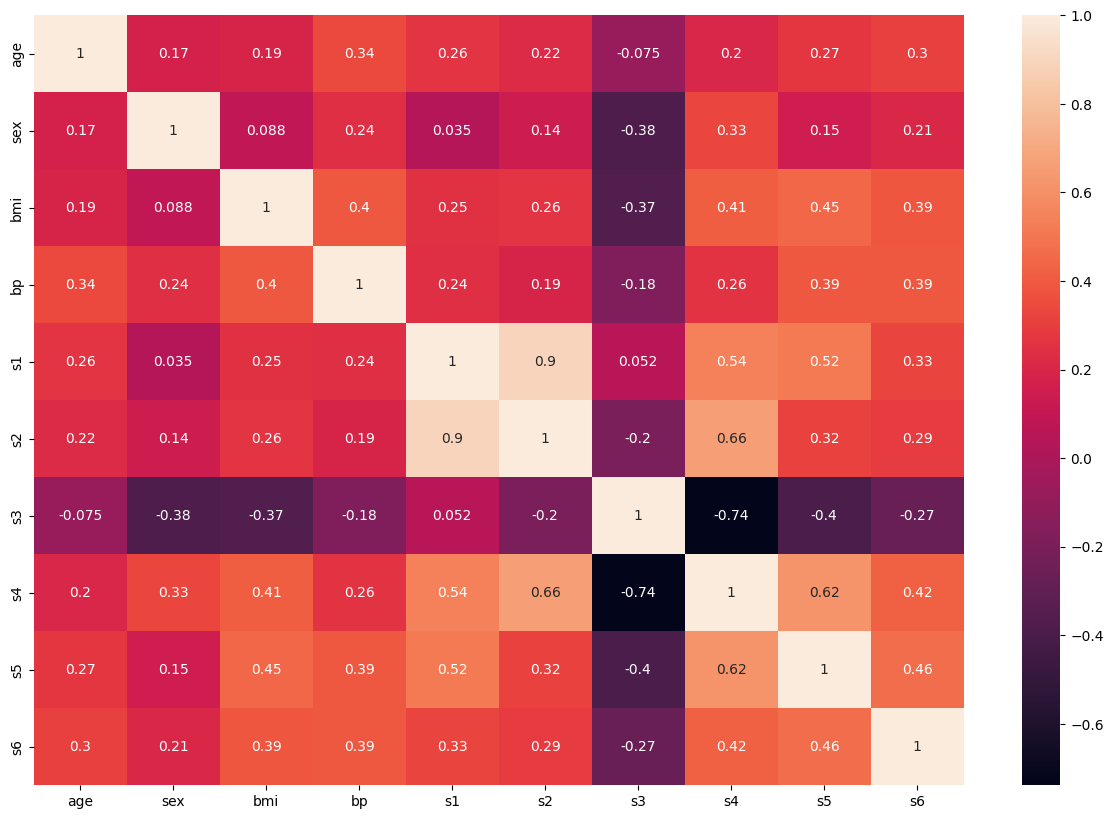

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor()
regressor.fit(X_train,y_train)

DecisionTreeRegressor()

**Hyperparameter Tuning**

In [ ]:
param={
    'criterion':['squared_error','friedman_mse','absolute_error','poisson'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5,6,7,8,9,10],
    'max_features':['auto','sqrt','log2']
}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
regressor=DecisionTreeRegressor()

In [ ]:
grid=GridSearchCV(regressor,param_grid=param,cv=5,scoring='neg_mean_squared_error')

In [ ]:
import warnings
warnings.filterwarnings('ignore')
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [ ]:
grid.best_params_

{'criterion': 'poisson',
 'max_depth': 3,
 'max_features': 'log2',
 'splitter': 'best'}

In [ ]:
y_pred=grid.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

3966.519663437914
0.3731469913863149
51.441683388693804


In [ ]:
selectmodel=DecisionTreeRegressor(criterion='friedman_mse',max_depth=4,max_features='log2',splitter='random')

In [ ]:
selectmodel.fit(X_train,y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=4,
                      max_features='log2', splitter='random')

[Text(0.5267857142857143, 0.9, 'bp <= 0.05\nfriedman_mse = 5757.456\nsamples = 309\nvalue = 152.738'),
 Text(0.2857142857142857, 0.7, 's5 <= -0.063\nfriedman_mse = 5028.024\nsamples = 259\nvalue = 142.263'),
 Text(0.40625, 0.8, 'True  '),
 Text(0.14285714285714285, 0.5, 's6 <= 0.003\nfriedman_mse = 2466.157\nsamples = 22\nvalue = 104.545'),
 Text(0.07142857142857142, 0.3, 'bp <= -0.073\nfriedman_mse = 2483.928\nsamples = 19\nvalue = 99.579'),
 Text(0.03571428571428571, 0.1, 'friedman_mse = 0.25\nsamples = 2\nvalue = 200.5'),
 Text(0.10714285714285714, 0.1, 'friedman_mse = 1436.913\nsamples = 17\nvalue = 87.706'),
 Text(0.21428571428571427, 0.3, 's3 <= 0.06\nfriedman_mse = 1208.0\nsamples = 3\nvalue = 136.0'),
 Text(0.17857142857142858, 0.1, 'friedman_mse = 0.0\nsamples = 1\nvalue = 182.0'),
 Text(0.25, 0.1, 'friedman_mse = 225.0\nsamples = 2\nvalue = 113.0'),
 Text(0.42857142857142855, 0.5, 's3 <= 0.046\nfriedman_mse = 5121.522\nsamples = 237\nvalue = 145.764'),
 Text(0.357142857142857

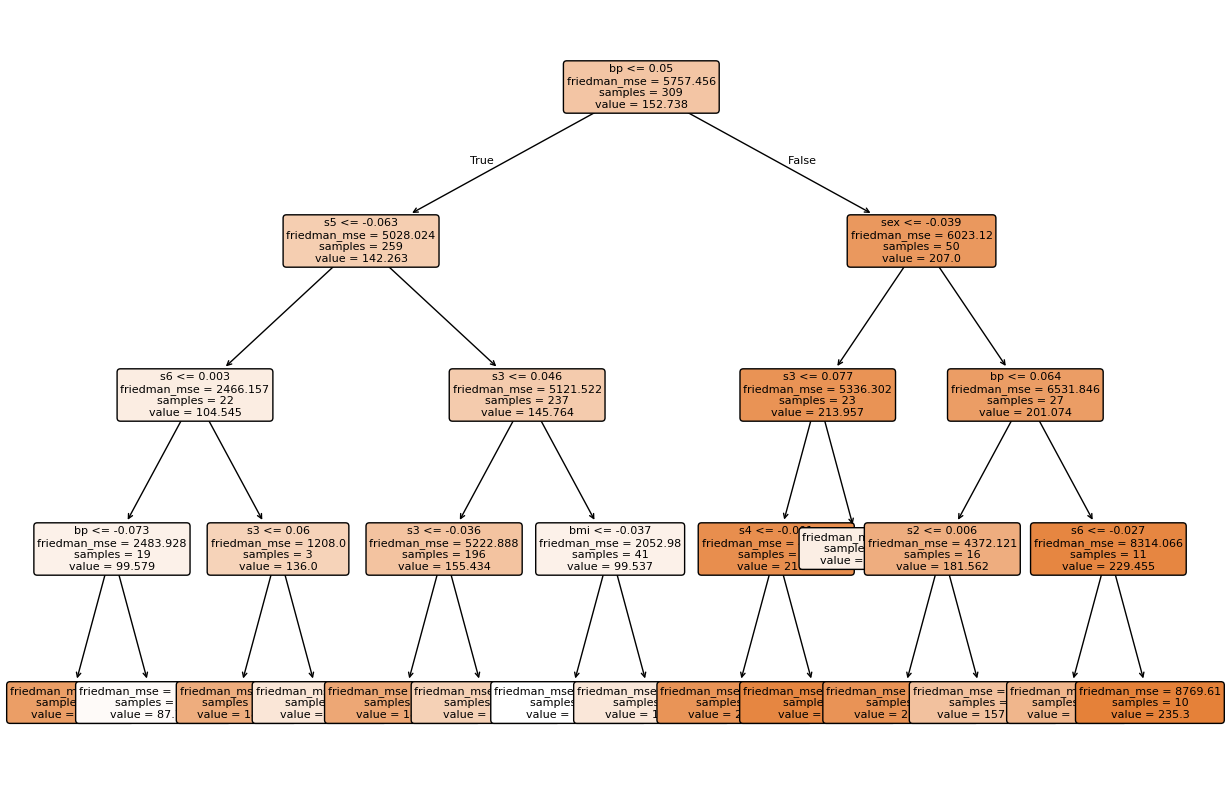

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(selectmodel,feature_names=X_train.columns,filled=True,class_names=['target'],rounded=True,fontsize=8)